C:\Users\USER\AppData\Local\Temp\ipykernel_3380\1955662056.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('6271.csv', parse_dates=True, index_col=1) #讀取目標股票csv檔的位置
C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


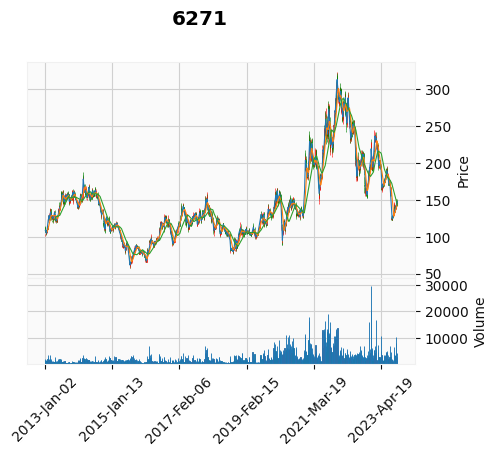

In [54]:
import pandas as pd
import matplotlib
import mplfinance as mpf
# 導入pandas、matplotlib、mplfinance模組，將mplfinance模組縮寫為mpf
# 這邊要導入matplotlib的原因是因為mplfinance繪圖時需要調用mptplotlib模組

df = pd.read_csv('6271.csv', parse_dates=True, index_col=1) #讀取目標股票csv檔的位置

file_name = '6271.csv'
title = file_name.replace('.csv', '')

def custom_date_conversion(date_string):
    parts = date_string.split('/')
    year = int(parts[0]) + 1911  # 強制轉換年份
    month = int(parts[1])
    day = int(parts[2])
    return f"{year}/{month}/{day}"

# 使用 .apply() 方法應用自訂函數來轉換日期

df.rename(columns={'日期':'date'}, inplace=True)

df['date'] = df['date'].apply(custom_date_conversion)

df['date'] = pd.to_datetime(df['date']) #將日期轉為datetime格式

df.set_index('date', inplace=False)  # 將 '日期' 列設置為索引

# 重置索引，將 '開盤價' 移回到新的列
df = df.reset_index(inplace=False)

# 變換欄位
df = df[['date', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']]

df.set_index('date', inplace=True)  # 將 '日期' 列設置為索引

# 重置索引，將 '開盤價' 移回到新的列
df = df.reset_index()                              

df.set_index('date', inplace=True)

# 擇一使用
# df['開盤價'] = df['開盤價'].str.replace(',', '').astype(float)
# df['收盤價'] = df['收盤價'].str.replace(',', '').astype(float)
# df['最高價'] = df['最高價'].str.replace(',', '').astype(float)
# df['最低價'] = df['最低價'].str.replace(',', '').astype(float)
# df['成交筆數'] = df['成交筆數'].str.replace(',', '').astype(int)

# 擇一使用
df['開盤價'] = df['開盤價'].astype(float)
df['收盤價'] = df['收盤價'].astype(float)
df['最高價'] = df['最高價'].astype(float)
df['最低價'] = df['最低價'].astype(float)
df['成交筆數'] = df['成交筆數'].str.replace(',', '').astype(int)

df.rename(columns={'成交筆數':'Volume'}, inplace = True) 
#這裡針對資料表做一下修正，因為交易量(Turnover)在mplfinance中須被改為Volume才能被認出來

df.rename(columns={'開盤價':'Open'}, inplace=True)
df.rename(columns={'最高價':'High'}, inplace=True)
df.rename(columns={'最低價':'Low'}, inplace=True)
df.rename(columns={'收盤價':'Close'}, inplace=True)
df.rename(columns={'漲跌價差':'Spread'}, inplace=True)

mc = mpf.make_marketcolors(up='r',down='g',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc)
#針對線圖的外觀微調，將上漲設定為紅色，下跌設定為綠色，符合台股表示習慣
#接著把自訂的marketcolors放到自訂的style中，而這個改動是基於預設的yahoo外觀

kwargs = dict(type='candle', mav=(5,20,60), volume=True, figratio=(20,16), figscale=0.75, title=title, style=s)
#設定可變參數kwargs，並在變數中填上繪圖時會用到的設定值

mpf.plot(df, **kwargs)
#選擇df資料表為資料來源，帶入kwargs參數，畫出目標股票的走勢圖

In [55]:
import talib
import talib.abstract as abstract
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from matplotlib.dates import DateFormatter
import datetime as dt

In [5]:
# 好像用不到
# df['Open'] = df['Open'].astype(float)
# df['Close'] = df['Close'].astype(float)
# df['High'] = df['High'].astype(float)
# df['Low'] = df['Low'].astype(float)

In [56]:
df

,Open,High,Low,Close,Spread,Volume
date,,,,,,
2013-01-02,102.5,104.0,101.5,103.5,+2.00,469
2013-01-03,106.0,110.5,106.0,110.5,+7.00,1369
2013-01-04,111.5,113.0,109.0,110.0,-0.50,2122
2013-01-07,112.0,113.0,109.0,110.0,0.00,909
2013-01-08,110.0,114.0,107.0,108.0,-2.00,1483
...,...,...,...,...,...,...
2023-10-06,148.5,150.5,147.0,147.5,-0.50,2586
2023-10-11,146.0,147.5,141.5,146.0,-1.50,2512
2023-10-12,146.5,148.0,146.0,147.5,+1.50,2084


In [57]:
df.rename(columns={'Open':'open'}, inplace=True)
df.rename(columns={'High':'high'}, inplace=True)
df.rename(columns={'Low':'low'}, inplace=True)
df.rename(columns={'Close':'close'}, inplace=True)
df.rename(columns={'Spread':'spread'}, inplace=True)
df.rename(columns={'Volume':'volume'}, inplace=True)

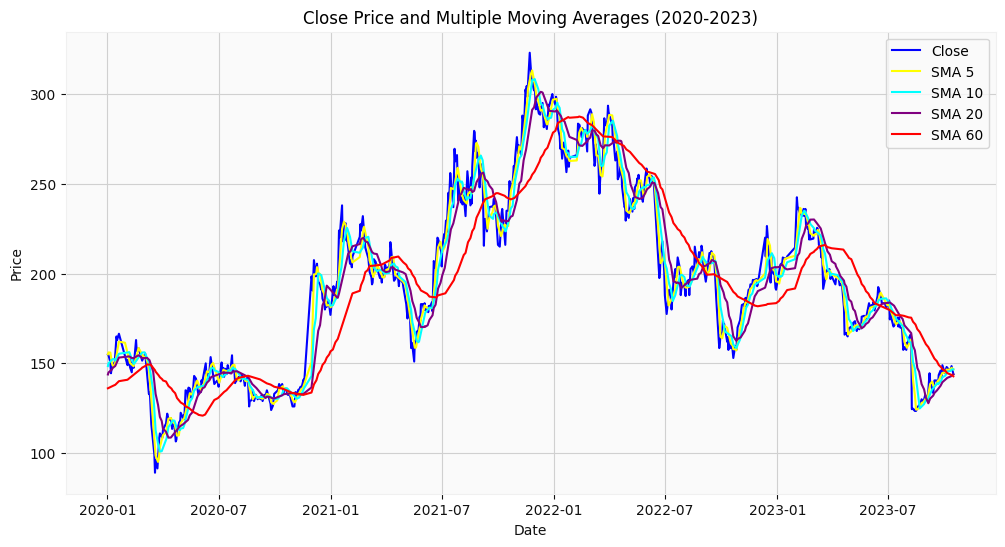

In [58]:
import matplotlib.pyplot as plt

# Assuming df has already been created and contains your data
df['spy_sma_5'] = abstract.SMA(df, 5)
df['spy_sma_10'] = abstract.SMA(df, 10)
df['spy_sma_20'] = abstract.SMA(df, 20)
df['spy_sma_60'] = abstract.SMA(df, 60)

# Filter data for the desired date range (2020-2023)
df_filtered = df['2020-01-01':'2023-12-31']

# Plot 'close', 'spy_sma_5', 'spy_sma_10', and 'spy_sma_20'
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['close'], label='Close', color='blue')
plt.plot(df_filtered.index, df_filtered['spy_sma_5'], label='SMA 5', color='yellow')
plt.plot(df_filtered.index, df_filtered['spy_sma_10'], label='SMA 10', color='aqua')
plt.plot(df_filtered.index, df_filtered['spy_sma_20'], label='SMA 20', color='purple')
plt.plot(df_filtered.index, df_filtered['spy_sma_60'], label='SMA 60', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Multiple Moving Averages (2020-2023)')
plt.legend()
plt.grid(True)
plt.show()

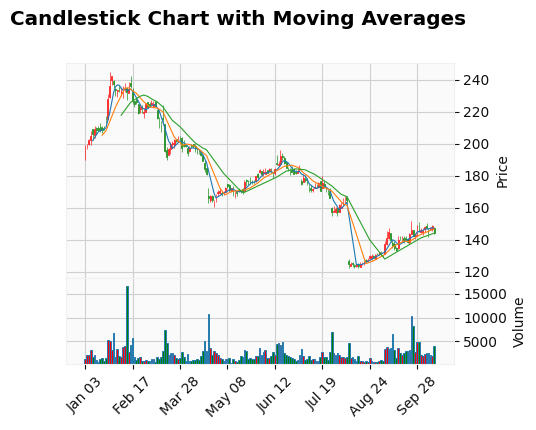

In [59]:
# Assuming df has already been created and contains your data
# df['spy_sma_5'] = abstract.SMA(df, 5)
# df['spy_sma_10'] = abstract.SMA(df, 10)
# df['spy_sma_20'] = abstract.SMA(df, 20)

# Filter data for the desired date range (2020-2023)
df_filtered = df['2023-01-01':'2023-12-31']

# Define the marketcolors and style
mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# Define additional plot settings
title = 'Candlestick Chart with Moving Averages'
kwargs = dict(
    type='candle',
    mav=(5, 10, 20),
    volume=True,
    figratio=(20, 16),
    figscale=0.75,
    title=title,
    style=s
)

# Plot the Candlestick chart with moving averages
mpf.plot(df_filtered, **kwargs)

# KD

In [60]:
# Calculate Stochastic Oscillator values
stoch = abstract.STOCH(df, fastk_period=9, slowk_period=3, slowd_period=3)

# Add 'k' and 'd' columns to the original DataFrame
df['k'] = stoch['slowk']
df['d'] = stoch['slowd']

# RSI

In [61]:
df_rsi = abstract.RSI(df, 14)
df['rsi'] = abstract.RSI(df, 14)

# MACD

In [62]:
a = 12
b =26
c =9
'''
簡單移動平均線: rolling
指數移動平均線: ewm
'''
df["EMA_Fast"] = df['open'].ewm(span = a, min_periods = a).mean()
df["EMA_Slow"] = df['open'].ewm(span = b, min_periods = b).mean()
df["DIF"] = df["EMA_Fast"] - df["EMA_Slow"]
df["MACD"] = df['DIF'].ewm(span = c, min_periods = c).mean()

# Bollinger Bands

In [63]:
'''
標準差: std
'''
n=20
df['SMA'] = df['close'].rolling(window = n).mean()
df['BB_20dstd_up'] = df['SMA'] + 2*df['close'].rolling(window = n).std(ddof=0)
df['BB_20dstd_down'] = df['SMA'] - 2*df['close'].rolling(window = n).std(ddof=0)
df['BB_width'] = df['BB_20dstd_up'] - df['BB_20dstd_down']

In [64]:
df

,open,high,low,close,spread,volume,spy_sma_5,spy_sma_10,spy_sma_20,spy_sma_60,...,d,rsi,EMA_Fast,EMA_Slow,DIF,MACD,SMA,BB_20dstd_up,BB_20dstd_down,BB_width
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,102.5,104.0,101.5,103.5,+2.00,469,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,106.0,110.5,106.0,110.5,+7.00,1369,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,111.5,113.0,109.0,110.0,-0.50,2122,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,112.0,113.0,109.0,110.0,0.00,909,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,110.0,114.0,107.0,108.0,-2.00,1483,108.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,148.5,150.5,147.0,147.5,-0.50,2586,146.3,145.50,141.925,144.575000,...,61.832612,58.111669,144.191021,142.003636,2.187385,1.285708,141.925,150.382393,133.467607,16.914786
2023-10-11,146.0,147.5,141.5,146.0,-1.50,2512,146.6,145.75,142.225,144.125000,...,64.405964,55.477646,144.469325,142.299663,2.169663,1.462499,142.225,150.812636,133.637364,17.175273
2023-10-12,146.5,148.0,146.0,147.5,+1.50,2084,146.9,145.90,142.775,143.700000,...,63.275613,57.549794,144.781737,142.610799,2.170938,1.604186,142.775,151.233576,134.316424,16.917151


In [65]:
df.to_csv(title + 'tec.csv', encoding='utf_8_sig')